In [6]:
from factor_evaluation import FactorEvaluation
from factor_evaluation import DataService
import numpy as np
import pandas as pd

In [7]:
ds=DataService()
df=ds['ETHUSDT_15m_2020_2025']['2021-10-01':]

In [8]:
evaluator=FactorEvaluation(df=df,future_return_periods=10)

In [ ]:
def rsi_factor(df, period=20):
    delta = df['close'].diff()
    gain = delta.where(delta > 0, 0).rolling(period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(period).mean()
    rs = gain / (gain + loss + 1e-10)
    rsi = 100 * rs
    return (rsi - 50) / 50

In [10]:
evaluator.set_factor(
    factor_data_or_func=rsi_factor,
    factor_name='rsi_factor'
)


üìä ÂçïÂ∏ÅÁßç (single) ËØ¶ÁªÜËØÑ‰º∞ÁªìÊûú:
--------------------------------------------------
üìà Âπ≥Á®≥ÊÄßÊ£ÄÈ™å (ADF):
   p_value: 0.000000
   ÊòØÂê¶Âπ≥Á®≥: ÊòØ
üîó Áõ∏ÂÖ≥ÊÄßÂàÜÊûê:
   IC (Pearson): 0.011612
   Rank_IC (Spearman): -0.034180
üìä ‰ø°ÊÅØÊØîÁéá:
   IR: 0.480281
   ÊúâÊïàÂàÜÁªÑÊï∞: 10
üìä Âõ†Â≠êÂàÜÂ∏É:
üìã Êï∞ÊçÆÊ¶ÇÂÜµ:
   Êï∞ÊçÆÈïøÂ∫¶: 129287
   Âõ†Â≠êÂàó: rsi_factor
   Êî∂ÁõäÁéáÂàó: future_return
   Êú™Êù•Êî∂ÁõäÂë®Êúü: 10
--------------------------------------------------

üñºÔ∏è  ÂçïÂ∏ÅÁßç (single) ÂõæÁâáÂ±ïÁ§∫:
----------------------------------------
üìä ÊòæÁ§∫ÂàÜÁªÑÂàÜÊûêÂõæ...


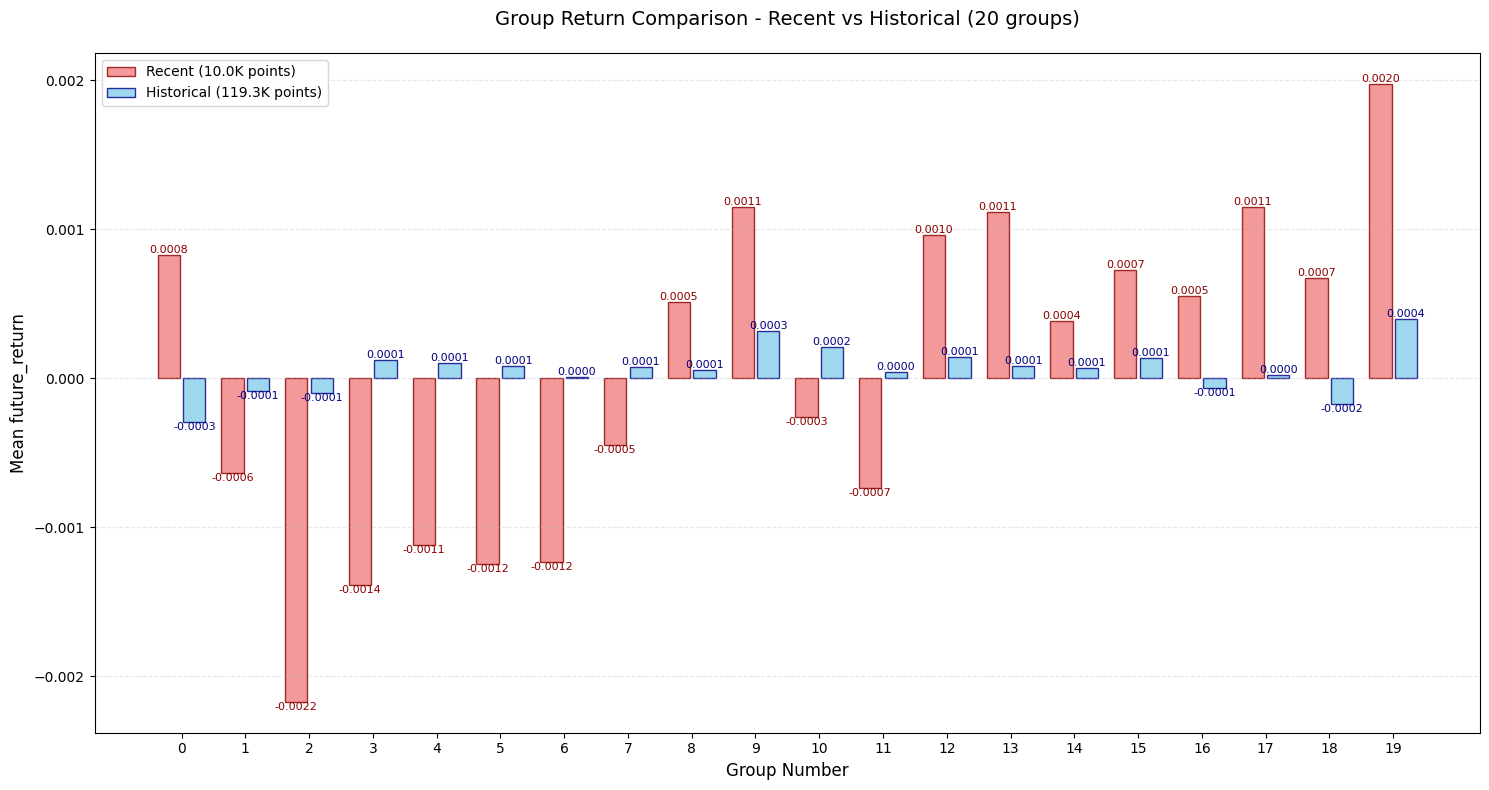

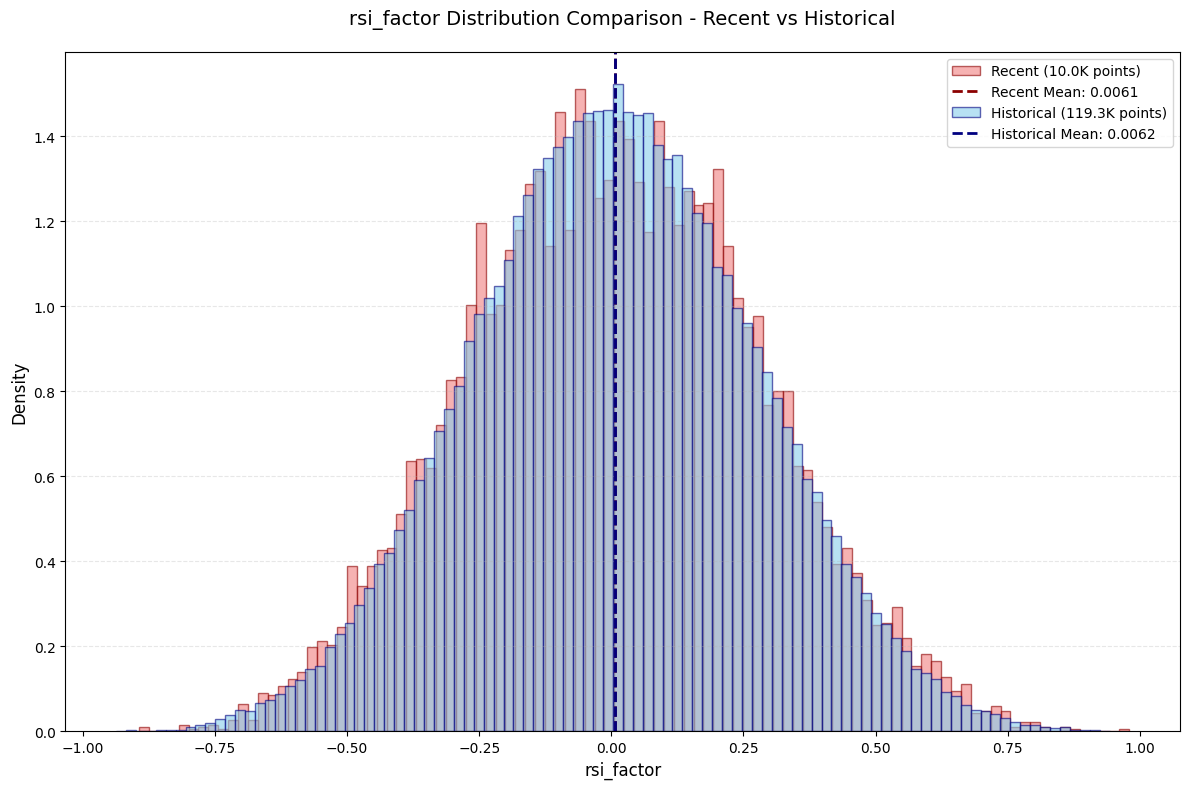

üìà ÊòæÁ§∫Âõ†Â≠êÂàÜÂ∏ÉÂõæ...
‚úÖ Â∑≤ÊòæÁ§∫ 2 ‰∏™ÂõæÁâá
----------------------------------------


In [11]:
result=evaluator.run_full_evaluation(run_stationarity_test=True)